In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

In [5]:
img_bgr: np.ndarray = cv2.imread('example_images/Bernese-mountain-dog-grass.webp', cv2.IMREAD_COLOR)
img_bgr.shape

(499, 800, 3)

In [8]:
x_img: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxW
x_img.shape

torch.Size([3, 499, 800])

In [12]:
x_img = x_img[None,...].float() / 255.
x_img = K.color.bgr_to_rgb(x_img)

In [15]:
def imshow(input: torch.Tensor, size: tuple = None):
    out = torchvision.utils.make_grid(input, nrow=4, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.figure(figsize=size)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

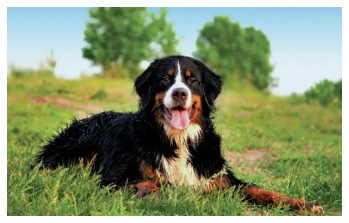

In [23]:
imshow(x_img)

### Define the rotation matrix

In [24]:
# create transformation (rotation)
alpha: float = 45.0  # in degrees
angle: torch.tensor = torch.ones(1) * alpha

In [31]:
# define the rotation center
center: torch.tensor = torch.ones(1, 2)
center[..., 0] = x_img.shape[3] / 2  # x
center[..., 1] = x_img.shape[2] / 2  # y

In [32]:
# define the scale factor
scale: torch.tensor = torch.ones(1, 2)

In [33]:
# compute the transformation matrix
M: torch.tensor = K.geometry.get_rotation_matrix2d(center, angle, scale)  # 1x2x3

### Apply the rotation

In [35]:
_, _, h, w = x_img.shape
x_warped: torch.tensor = K.geometry.warp_affine(x_img, M, dsize=(h, w))

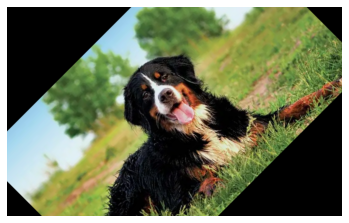

In [36]:
imshow(x_warped)

### TorchVision's rotate

In [43]:
tv_rotate = torchvision.transforms.RandomRotation((45,45))
tv_x_warped = tv_rotate(x_img)

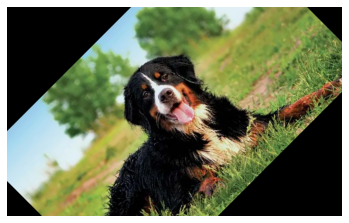

In [44]:
imshow(tv_x_warped.unsqueeze(0))

### Comparison

In [45]:
k_np = np.array(x_warped)
tv_np = np.array(tv_x_warped)

In [51]:
np.all(k_np == tv_np)

False

In [52]:
b_im = k_np == tv_np

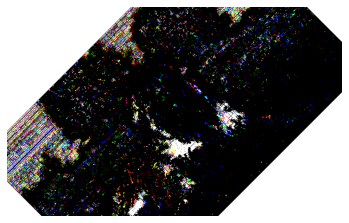

In [54]:
imshow(torch.Tensor(b_im))

### Conclustion
Different values inside of the image after the rotation. <br>
Meaning, we should imply kornia's rotation on the targets too.